### Regresion con modelos SVR Support Vector Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
df=pd.read_csv(r'C:\Users\carolina\Desktop\FormDataAnalyst\Modelos\regresion_svr.csv')

In [47]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [48]:
df.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


##### Division variables independiente y dependiente

In [49]:
# En este caso es necesario que tanto x como y sean matrices

x=df.iloc[:,[1]].values # [[]] para que sea un array de arrays o sea matriz y luego no tenga que hacer el reshape en los modelos
y=df.iloc[:,[2]].values  # tambien puede hacerse un reshape del array -> y.reshape(len(y),1)


In [50]:
x, y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]], dtype=int64),
 array([[  45000],
        [  50000],
        [  60000],
        [  80000],
        [ 110000],
        [ 150000],
        [ 200000],
        [ 300000],
        [ 500000],
        [1000000]], dtype=int64))

##### Transformacion

* No hay missing 

* No hay dummy

#### Normalizacion / estandarizacion

* En este tipo de modelo si que es necesario normalizar

In [51]:
from sklearn.preprocessing import StandardScaler

* Una transformacion para cada variable (en este caso x,y)

In [52]:
sc_x=StandardScaler()
x=sc_x.fit_transform(x)
x

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [53]:
sc_y=StandardScaler()
y=sc_y.fit_transform(y)
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

#### Seleccion de variables predictoras no aplica porque solo hay una

#### Creacion del modelo

In [54]:
from sklearn.svm import SVR # de Super vector machine importamos Super vertor regression

Opciones de kernel de SVR 

- linear (para modelos lineales)
- poly (para modelos polinomicos)
- rbf (radial basic function o gaussiano para modelos radiales)
- sigmoid (sigmoidal para modelos sigmoides)
- precomputed (no es usado para ML convencional)

Otros parametros

- degree :  para indicar el grado del polinomio en kernel poly (por defecto 3)
- gamma: para darle escalado al sigmoide, rbf o poly (por defecto auto escalado)

In [55]:
reg_svr_klineal=SVR(kernel='linear')
reg_svr_klineal.fit(x,y)  # la advertencia es para el modelo lineal quiere un array 1D. Pero asi lo acepta igualmente.

C:\Users\carolina\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [56]:
reg_svr_kpoly=SVR(kernel='poly')
reg_svr_kpoly.fit(x,y)  

C:\Users\carolina\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='poly')

In [57]:
reg_svr_kgauss=SVR(kernel='rbf')  # 
reg_svr_kgauss.fit(x,y)  

C:\Users\carolina\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [58]:
reg_svr_ksigmoide=SVR(kernel='sigmoid')
reg_svr_ksigmoide.fit(x,y)  

C:\Users\carolina\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='sigmoid')

#### Prediccion

* Dato a predecir 6,5 años de experiencia RECORDAR QUE APLICAMOS LA ESTANDARIZACION!!! 

Para transformar fit.transform 
Para volver fit.inverse


* Deberia dar entre -0.35 Y -0.17

In [59]:
y_svr_klineal=reg_svr_klineal.predict(sc_x.fit_transform( [[ 6.5 ]] ) )  # Transformar antes de pasar el valor y debe ser array de array
sc_y.inverse_transform( [[ y_svr_klineal[0] ]] ) # hay que hacer la inversa de la transformacion en 'y' para volver al rango de valores original

array([[173502.7385271]])

In [60]:
y_svr_kpoly=reg_svr_kpoly.predict(sc.fit_transform([[6.5]]))
sc_y.inverse_transform( [[ y_svr_kpoly[0] ]] )

array([[190750.94023226]])

In [61]:
y_svr_kgauss=reg_svr_kgauss.predict(sc.fit_transform([[6.5]]))
sc_y.inverse_transform( [[ y_svr_kgauss[0] ]] )  # este da fuera de rango

array([[131106.77303274]])

In [62]:
y_svr_ksigmoide=reg_svr_ksigmoide.predict(sc.fit_transform([[6.5]]))
sc_y.inverse_transform( [[ y_svr_ksigmoide[0] ]] ) 

array([[179118.98283147]])

#### Evaluacion de los modelos



In [63]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 

En el calculo de los estadisticos no hace falta transformar. Hacemos la prediccion directamente sobre x

NOTA: En estos ejemplos no estan corregidos los mae y mse. Habria que transformar las variables.

El R2 da bien aunque no se transforme ni se haga la inversa de la transformacion.

* Kernel lineal 

In [65]:
r2_klineal=r2_score(y, reg_svr_klineal.predict(x) ) 
mae_klineal=mean_absolute_error(y, reg_svr_klineal.predict(x))
mse_klineal=mean_squared_error(y, reg_svr_klineal.predict(x))
print(f'Estadisticos de la SVR con kernel lineal\n r2: {r2_klineal:.2f} \n mae: {mae_klineal:.2f} \n mse: {mse_klineal:.2f}')

# Este no da muy bien

Estadisticos de la SVR con kernel lineal
 r2: 0.45 
 mae: 0.38 
 mse: 0.55


<function matplotlib.pyplot.show(close=None, block=None)>

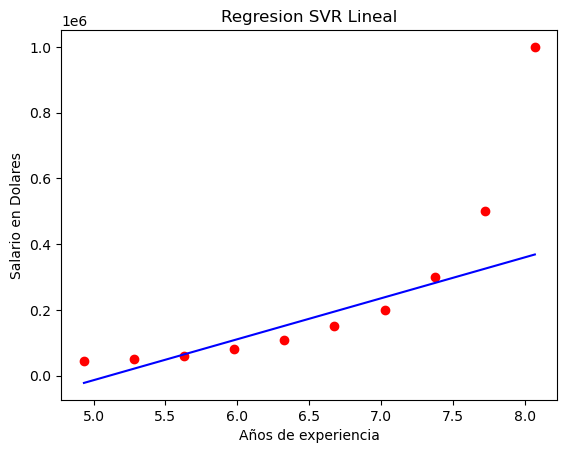

In [68]:
plt.title('Regresion SVR Lineal')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario en Dolares')
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(reg_svr_klineal.predict(x).reshape(-1, 1)), color='blue')
plt.show

* Kernel polinomico

In [69]:
r2_kpoly=r2_score(y, reg_svr_kpoly.predict(x) ) 
mae_kpoly=mean_absolute_error(y, reg_svr_kpoly.predict(x))
mse_kpoly=mean_squared_error(y, reg_svr_kpoly.predict(x))
print(f'Estadisticos de la SVR con kernel polinomico\n r2: {r2_kpoly:.2f} \n mae: {mae_kpoly:.2f} \n mse: {mse_kpoly:.2f}')


Estadisticos de la SVR con kernel polinomico
 r2: 0.65 
 mae: 0.38 
 mse: 0.35


<function matplotlib.pyplot.show(close=None, block=None)>

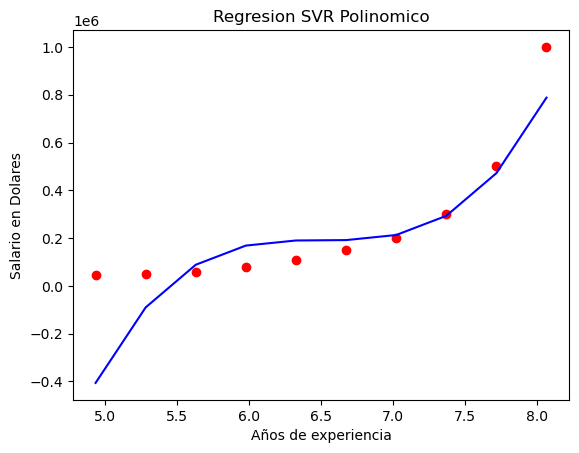

In [71]:
plt.title('Regresion SVR Polinomico')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario en Dolares')
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(reg_svr_kpoly.predict(x).reshape(-1, 1)), color='blue')
plt.show

* Kernel Gaussiano o radial (rbf)

In [72]:
r2_kgauss=r2_score(y, reg_svr_kgauss.predict(x) ) 
mae_kgauss=mean_absolute_error(y, reg_svr_kgauss.predict(x))
mse_kgauss=mean_squared_error(y, reg_svr_kgauss.predict(x))
print(f'Estadisticos de la SVR con kernel radial\n r2: {r2_kgauss:.2f} \n mae: {mae_kgauss:.2f} \n mse: {mse_kgauss:.2f}')


Estadisticos de la SVR con kernel radial
 r2: 0.75 
 mae: 0.22 
 mse: 0.25


<function matplotlib.pyplot.show(close=None, block=None)>

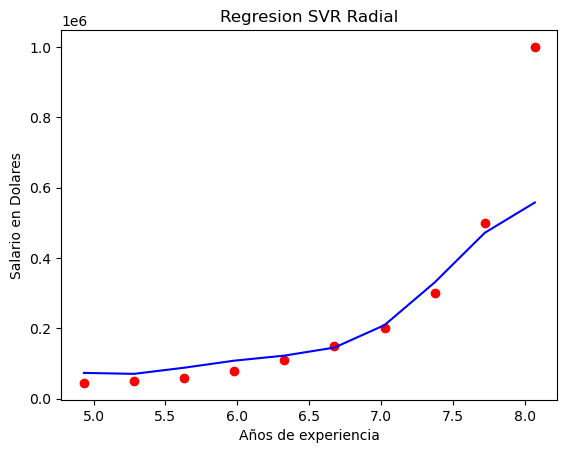

In [73]:
plt.title('Regresion SVR Radial')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario en Dolares')
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(reg_svr_kgauss.predict(x).reshape(-1, 1)), color='blue')
plt.show

* Kernel Sigmoide

In [74]:
r2_ksigm=r2_score(y, reg_svr_ksigmoide.predict(x) ) 
mae_ksigm=mean_absolute_error(y, reg_svr_ksigmoide.predict(x))
mse_ksigm=mean_squared_error(y, reg_svr_ksigmoide.predict(x))
print(f'Estadisticos de la SVR con kernel Sigmoide\n r2: {r2_ksigm:.2f} \n mae: {mae_ksigm:.2f} \n mse: {mse_ksigm:.2f}')
# Esto da muy mal

Estadisticos de la SVR con kernel Sigmoide
 r2: -0.01 
 mae: 0.63 
 mse: 1.01


<function matplotlib.pyplot.show(close=None, block=None)>

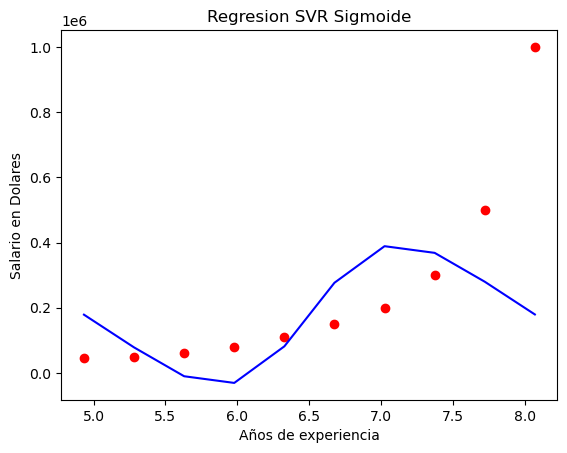

In [77]:
plt.title('Regresion SVR Sigmoide')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario en Dolares')
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(reg_svr_ksigmoide.predict(x).reshape(-1, 1)), color='blue')
plt.show

* Este ultimo da muy mala aproximacion tal como lo indicaba R2